# **Predicting Diabetes Using Artificial Neural Networks**

✋ By Alireza Khandan ✋


⭐**Introduction**:

* Welcome to the Diabetes Prediction Project using Artificial Neural Networks (ANNs). This project aims to predict the likelihood of diabetes mellitus in individuals based on various health indicators and risk factors. By leveraging a dataset collected from Medical City Hospital and Al-Kindy Teaching Hospital in Iraq, we build and evaluate a neural network model to assist healthcare providers in early diagnosis and management of diabetes.

🚀**What This Project Does**

* **Data Loading and Preprocessing:**

  * Loads a comprehensive dataset containing medical and laboratory analysis data.

  * Cleans and preprocesses the data by handling missing values, encoding categorical variables, and standardizing numerical features.

* **Building and Training the Neural Network:**

  * Defines a neural network architecture using the Keras API within TensorFlow.

  * Trains the model using the prepared dataset, incorporating early stopping to prevent overfitting.

  * Evaluates the model's performance on a separate test set.

* **Model Evaluation and Interpretation:**

  * Saves the trained model to disk for future use.

  * Loads the saved model and makes predictions on the test data.

  * Generates a confusion matrix and classification report to evaluate the model's performance.

  * Visualizes the results using plots to provide insights into the model's accuracy and areas for improvement.

☝**Key Libraries and Tools Used**

* Google Colab: For running the project in a cloud-based environment with access to powerful computational resources.

* TensorFlow and Keras: For building and training the neural network.

* Pandas and NumPy: For data manipulation and numerical computations.

* Scikit-learn: For preprocessing and evaluating the model.

* Matplotlib and Seaborn: For data visualization.

📚**How to Use This Notebook**

* Follow the steps in each block to understand the data preprocessing, model building, training, and evaluation processes.

* Modify the code as needed to experiment with different neural network architectures or preprocessing techniques.

* Use the provided visualizations to interpret the model's performance and identify potential improvements.

By the end of this project, you will have a trained neural network model capable of predicting diabetes based on a variety of health indicators, providing valuable insights for early diagnosis and management of this chronic condition.

🔽 🔽 🔽 🔽 🔽 🔽 🔽 🔽 🔽 🔽 🔽 🔽

✅**Block 1: Setting up and Verifying the Environment**

Import necessary libraries:

* Import NumPy, Pandas, TensorFlow, and Keras for numerical operations, data manipulation, and building the neural network.

Print library versions:

* Display versions of NumPy, Pandas, TensorFlow, and Keras to ensure correct installation.

Verify NumPy functionality:

* Create a NumPy array and check its type to ensure NumPy is working correctly.

Verify Pandas functionality:

* Create a Pandas DataFrame and check its type to ensure Pandas is working correctly.

Verify TensorFlow functionality:

* Create a TensorFlow constant, perform a reduction operation, and check the result type to ensure TensorFlow is working correctly.

Verify Keras functionality:

* Retrieve and check the Keras backend to ensure Keras is integrated correctly within TensorFlow.

In [32]:
# Block 1: Setting up and Verifying the Environment

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

def report_test_failure(error_message):
    print(f"!!!! Test failed !!!! {error_message}")

# Print versions of the key libraries to ensure they are correctly installed
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras is included in TensorFlow. Using TensorFlow version:", tf.__version__)
print()

# Verify NumPy installation and functionality
try:
    np_array = np.array([1, 2, 3, 4])
    assert isinstance(np_array, np.ndarray), "Array not created as ndarray"
    print("NumPy works fine.         |       The created array:", np_array)
except Exception as e:
    report_test_failure(str(e))

# Verify Pandas installation and functionality
try:
    df = pd.DataFrame(data={'Column1': [1, 2], 'Column2': [3, 4]})
    assert isinstance(df, pd.DataFrame), "DataFrame not created properly"
    print("Pandas works fine.        |       DataFrame created:\n", df)
except Exception as e:
    report_test_failure(str(e))

# Verify TensorFlow installation and basic operation
try:
    tf_constant = tf.constant([1.0, 2.0, 3.0])
    result = tf.reduce_sum(tf_constant).numpy()
    assert isinstance(result, (float, np.floating)), "TensorFlow operation did not return a float or numpy floating type"
    print("TensorFlow works fine.    |       TensorFlow operation result:", result)
except Exception as e:
    report_test_failure(str(e))

# Verify Keras backend and functionality within TensorFlow
try:
    backend = keras.backend.backend()
    assert isinstance(backend, str), "Keras backend not returned as string"
    print("Keras works fine.         |       Using backend:", backend)
except Exception as e:
    report_test_failure(str(e))


NumPy version: 1.25.2
Pandas version: 2.0.3
TensorFlow version: 2.15.0
Keras is included in TensorFlow. Using TensorFlow version: 2.15.0

NumPy works fine.         |       The created array: [1 2 3 4]
Pandas works fine.        |       DataFrame created:
    Column1  Column2
0        1        3
1        2        4
TensorFlow works fine.    |       TensorFlow operation result: 6.0
Keras works fine.         |       Using backend: tensorflow


✅**Block 2: Loading the Dataset into DataFrame with Error Handling**


Load the dataset into a Pandas DataFrame:

* Use the pd.read_csv() function to load the dataset from a CSV file into a Pandas DataFrame. This allows for easy data manipulation and analysis. The file path is specified as 'Dataset of Diabetes.csv'.

Print data shape and overview:

* After successfully loading the data, print the shape of the DataFrame using data.shape to understand the number of rows and columns.

* Use data.describe() to print statistical summaries of the numerical columns, including count, mean, standard deviation, min, max, and quartiles.

* Use data.info() to print a concise summary of the DataFrame, including the data types of each column and the number of non-null entries.

Handle file not found error:

* Use a try-except block to handle potential errors. If the specified file is not found, catch the FileNotFoundError and print an error message indicating that the file path should be checked.

Handle empty file error:

* Catch the pd.errors.EmptyDataError if the file is empty and print an error message indicating that the file contains no data.

Handle parsing errors:

* Catch the pd.errors.ParserError if there are issues parsing the file (e.g., invalid data formats) and print an error message indicating a parsing problem.

Handle any other unexpected errors:

* Use a general except block to catch any other unexpected errors that may occur during the file loading process and print an appropriate error message.

In [33]:
# Block 2: Loading the Dataset into DataFrame with Error Handling

# Try to load the dataset into a Pandas DataFrame
try:
    data = pd.read_csv('Dataset of Diabetes.csv')
    print("Data loaded successfully. Data shape:", data.shape)
    print("\nData Overview:")
    print(data.describe())
    print(data.info())
# Handle file not found error
except FileNotFoundError:
    print("Error: The file was not found. Check the file path and ensure it is correct.")
# Handle case where the file is empty
except pd.errors.EmptyDataError:
    print("Error: No data. The file is empty.")
# Handle parsing errors such as invalid data formats
except pd.errors.ParserError:
    print("Error: Parse error. The file could not be parsed.")
# Handle any other unexpected errors
except Exception as e:
    print("Error: An unexpected error occurred:", e)


Data loaded successfully. Data shape: (1000, 14)

Data Overview:
                ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1

✅**Block 3: Data Preprocessing and Exploratory Data Analysis**

Map 'CLASS' column from string to integer values:

* Check if the 'CLASS' column is of object type. If so, strip any whitespace and map the values 'N', 'P', and 'Y' to 0, 1, and 2 respectively. Convert the mapped values to integers using data['CLASS'].astype(int).

Drop rows with NaN values in 'CLASS' and remove identifier columns:

* Use data.dropna(subset=['CLASS'], inplace=True) to remove any rows where the 'CLASS' column has NaN values.

* Drop identifier columns 'ID' and 'No_Pation' using data.drop(['ID', 'No_Pation'], axis=1, inplace=True).

Encode 'Gender' column to numerical values:

* Map the 'Gender' column values 'M' and 'F' to 0 and 1 respectively using data['Gender'].map({'M': 0, 'F': 1}).

Fill missing values in 'Gender' column with the mode:

* Use data['Gender'].fillna(data['Gender'].mode()[0], inplace=True) to fill any missing values in the 'Gender' column with the most frequent value (mode).

Check for any remaining missing values in the dataset:

* Use data.isnull().sum() to print the count of missing values in each column.

Standardize numerical columns:

* Use StandardScaler from scikit-learn to standardize numerical columns so they have a mean of 0 and a standard deviation of 1. Identify numerical columns and apply the scaler using data[numerical_cols] = scaler.fit_transform(data[numerical_cols]).

Determine the layout for plotting histograms of numerical columns:

* Calculate the number of numerical columns and determine the layout for the histograms. Set the number of columns per row to 3 and calculate the number of rows needed using (num_numerical_cols + cols_per_row - 1) // cols_per_row.

Plot histograms of numerical columns:

* Use Matplotlib to plot histograms of the numerical columns to visualize their distributions. Use data[numerical_cols].hist() to generate the histograms and plt.tight_layout() to adjust the layout.

Plot a bar chart for 'Gender' column distribution:

* Use Seaborn to create a bar chart showing the distribution of the 'Gender' column using sns.barplot(). This helps visualize the number of male and female entries in the dataset.

Display updated data overview after preprocessing:

* Use data.describe() and data.info() to print a summary of the dataset after preprocessing, providing insights into the data distributions and structure.

Missing values in each column:
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64
Histograms of Numerical Columns:


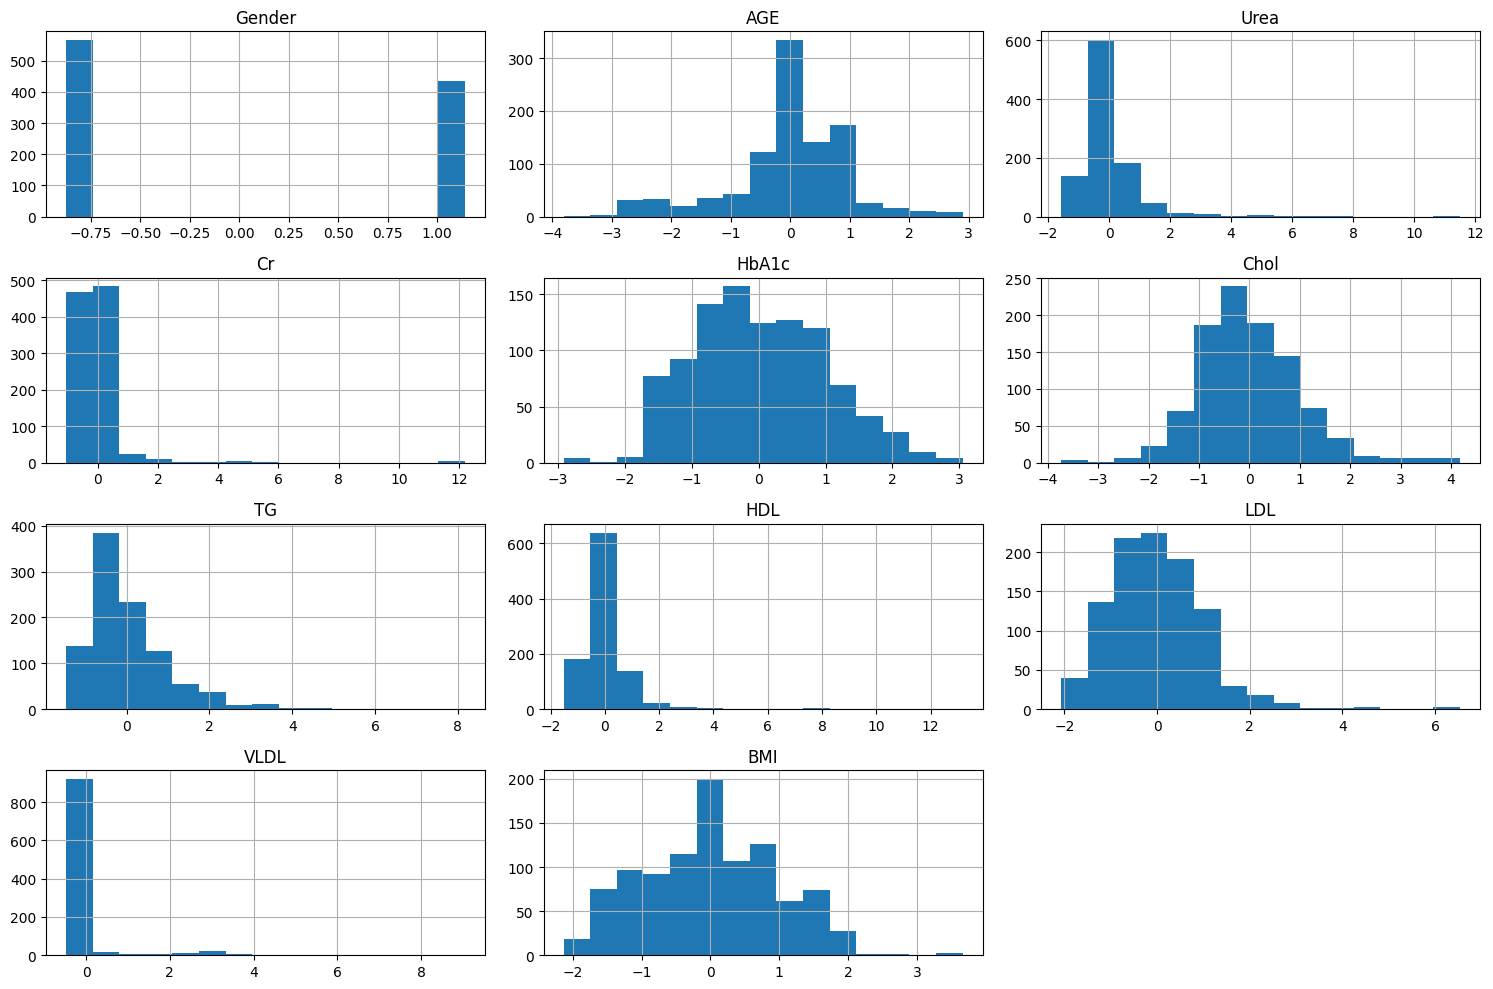

Bar Chart of Gender Distribution:


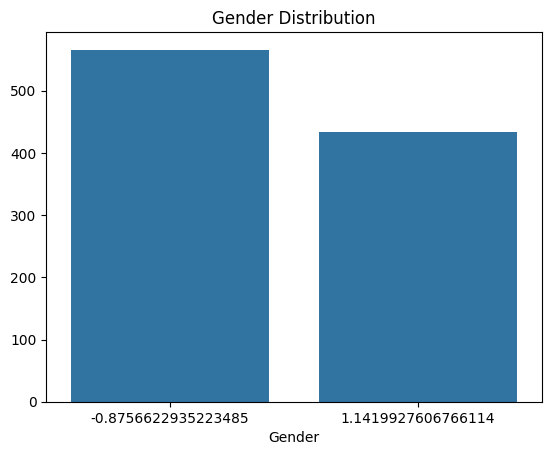

Data preprocessing completed. Here's the updated data overview:
             Gender           AGE          Urea            Cr        HbA1c  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1000.000000   
mean   1.101341e-16  1.705303e-16 -1.847411e-16  2.309264e-17     0.000000   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00     1.000500   
min   -8.756623e-01 -3.812235e+00 -1.576421e+00 -1.049842e+00    -2.914303   
25%   -8.756623e-01 -2.874413e-01 -4.856476e-01 -3.493135e-01    -0.703255   
50%   -8.756623e-01  1.673709e-01 -1.788675e-01 -1.491625e-01    -0.111010   
75%    1.141993e+00  6.221830e-01  1.960860e-01  6.766770e-02     0.757616   
max    1.141993e+00  2.896244e+00  1.151286e+01  1.219348e+01     3.047629   

               Chol            TG           HDL           LDL          VLDL  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -1.136868e-16 -1.136868e-16  5.151435e-17  1.278977e-16  5.861978e-17

In [34]:
# Block 3: Data Preprocessing and Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Map 'CLASS' column from string to integer values if it's of object type
if data['CLASS'].dtype == object:
    data['CLASS'] = data['CLASS'].str.strip().map({'N': 0, 'P': 1, 'Y': 2})
    data['CLASS'] = data['CLASS'].astype(int)  # Convert to integer after mapping

# Drop rows with NaN values in 'CLASS' and remove identifier columns
data.dropna(subset=['CLASS'], inplace=True)
data.drop(['ID', 'No_Pation'], axis=1, inplace=True)

# Encode 'Gender' column to numerical values
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})

# Fill missing values in 'Gender' column with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Check for any remaining missing values in the dataset
print("Missing values in each column:")
print(data.isnull().sum())

# Standardize numerical columns to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'CLASS']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Determine the layout for plotting histograms of numerical columns
num_numerical_cols = len(numerical_cols)
cols_per_row = 3  # Number of columns per row in the plot
rows = (num_numerical_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Plot histograms of numerical columns to visualize data distributions
print("Histograms of Numerical Columns:")
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(rows, cols_per_row))
plt.tight_layout()
plt.show()

# Plot a bar chart to visualize the distribution of the 'Gender' column
print("Bar Chart of Gender Distribution:")
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.show()

# Display updated data overview after preprocessing
print("Data preprocessing completed. Here's the updated data overview:")
print(data.describe())
print(data.info())


✅**Block 4: Building and Compiling the ANN**

Prepare the dataset:

* Features (X): Select all columns except the 'CLASS' column, which contains the labels.

* Labels (y): Select the 'CLASS' column to be used as the target variable for prediction.

Split the data:

* Split the data into training and testing sets using an 80/20 split. This allows the model to be evaluated on unseen data to assess its performance and generalization.

Convert labels to one-hot encoding:

* This transformation is necessary for multi-class classification, where the output layer has multiple neurons corresponding to each class.

Define the neural network architecture:

* Input layer: Accepts the preprocessed features from the dataset.

* Hidden layers:

  * Add multiple dense (fully connected) layers with ReLU (Rectified Linear Unit) activation functions. ReLU helps the network learn complex patterns by introducing non-linearity.

  * Include dropout layers after each dense layer to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

* Output layer: Use a dense layer with a softmax activation function to output probabilities for each class (Non-Diabetic, Pre-Diabetic, Diabetic).

Compile the model:

* Optimizer: Use the Adam optimizer, which adjusts the learning rate during training and helps in faster convergence.

* Loss function: Use categorical crossentropy, suitable for multi-class classification problems.

* Metrics: Track accuracy to monitor the performance of the model.

Display the model's architecture:

* Print a summary of the model architecture, including the number of layers, neurons in each layer, and the shape of the input and output.

In [35]:
# Block 4: Building and Compiling the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Prepare the features (X) and labels (y)
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Labels

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding for multi-class classification
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Define the neural network structure
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(3, activation='softmax')  # Output layer with softmax activation for three classes
])

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                768       
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3427 (13.39 KB)
Trainable params: 3427 (

✅**Block 5: Training and Evaluating the Model**

Define early stopping callback to prevent overfitting:

* Use the EarlyStopping callback from Keras to monitor the validation loss (val_loss). If the validation loss does not improve for 10 consecutive epochs (patience=10), training will stop. The restore_best_weights=True parameter ensures that the model's best weights are restored after stopping.

Train the model with early stopping:

* Call the model.fit() function to train the model on the training set (X_train, y_train). The model will be trained for a maximum of 50 epochs with a batch size of 10. The training data is further split into training and validation sets (validation_split=0.2). The early stopping callback is included in the callbacks parameter to monitor and control the training process.

Evaluate the model on the test data:

* Use the model.evaluate() function to evaluate the trained model on the test set (X_test, y_test). This function returns the test loss and test accuracy, which provide an indication of the model's performance on unseen data.

Plot training and validation accuracy over epochs:

* Use Matplotlib to create a plot showing the training accuracy (history.history['accuracy']) and validation accuracy (history.history['val_accuracy']) over the epochs. This plot helps visualize how well the model is learning and generalizing.

Plot training and validation loss over epochs:

* Use Matplotlib to create a plot showing the training loss (history.history['loss']) and validation loss (history.history['val_loss']) over the epochs. This plot helps assess the model's performance and check for signs of overfitting or underfitting.

Epoch 1/50
64/64 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.7719 - val_loss: 0.4299 - val_accuracy: 0.8250
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8687 - val_loss: 0.3167 - val_accuracy: 0.8813
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.8859 - val_loss: 0.2960 - val_accuracy: 0.8813
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.8969 - val_loss: 0.2854 - val_accuracy: 0.8750
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9109 - val_loss: 0.2844 - val_accuracy: 0.8813
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9047 - val_loss: 0.2763 - val_accuracy: 0.8813
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9094 - val_loss: 0.2829 - val_accuracy: 0.8687
Epoch 8/50
64/64 [==

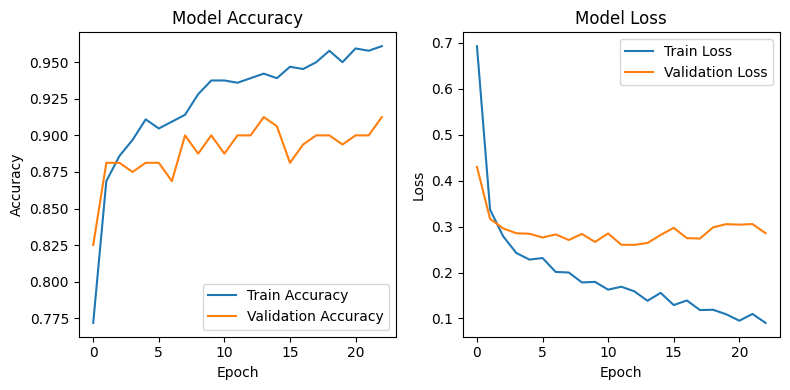

In [36]:
# Block 5: Train and Evaluate the ANN Model

from tensorflow.keras.callbacks import EarlyStopping

try:
    # Define early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Plot training and validation accuracy over epochs
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training and validation loss over epochs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("An error occurred during training or evaluation:", e)


✅**Block 6: Save and Load the Model, Make Predictions, and Evaluate**

Save the trained model to disk:

* Use the model.save() function to save the trained model in the '.keras' format. This allows the model to be saved to disk and reloaded later without retraining. The save_format='keras' parameter specifies the format.

Load the model back from disk:

* Use the load_model() function to load the saved model from disk. This ensures that the model can be reused for predictions without needing to be retrained. The path to the saved model file is provided as an argument.

Make predictions on the test dataset:

* Use the model.predict() function on the test dataset (X_test) to generate predictions. The predictions are in the form of probabilities for each class.

* Convert the predicted probabilities to label indices using np.argmax(y_pred, axis=1), which identifies the class with the highest probability for each prediction.

Convert test labels from one-hot encoding back to label indices:

* Convert the one-hot encoded test labels (y_test) back to their original label indices using np.argmax(y_test, axis=1). This step is necessary for evaluating the predictions against the true labels.

Generate a confusion matrix and classification report:

* Use confusion_matrix() from scikit-learn to create a confusion matrix comparing the true labels (y_test_labels) and the predicted labels (y_pred_labels). The confusion matrix provides insights into the model's performance by showing how many instances were correctly or incorrectly classified for each class.

* Use classification_report() from scikit-learn to generate a detailed classification report, which includes precision, recall, f1-score, and support for each class. The digits=2 parameter specifies the number of decimal places for the report.

Visualize the confusion matrix using a heatmap:

* Use Matplotlib and Seaborn to create a heatmap of the confusion matrix. The heatmap provides a visual representation of the model's performance, making it easier to understand the true vs. predicted labels. The plot includes labels for each class ('Non-Diabetic', 'Pre-Diabetic', 'Diabetic') on both the x and y axes.

Model saved successfully in the '.keras' format.
Model loaded successfully.
7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[ 17   1   3]
 [  3   1   2]
 [  3   1 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.33      0.17      0.22         6
           2       0.97      0.98      0.97       173

    accuracy                           0.94       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.93      0.94      0.93       200



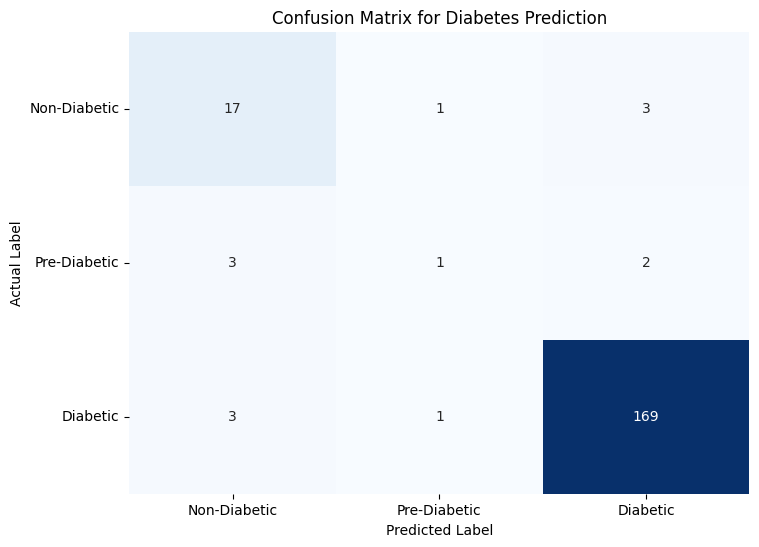

In [37]:
# Block 6: Save and Load the Model, Make Predictions, and Evaluate

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

try:
    # Save the trained model to disk using the modern '.keras' format
    model.save('diabetes_prediction_model.keras', save_format='keras')
    print("Model saved successfully in the '.keras' format.")

    # Load the model back from disk to ensure it can be reused without retraining
    loaded_model = load_model('diabetes_prediction_model.keras')
    print("Model loaded successfully.")

    # Use the loaded model to predict the diabetes status based on the test dataset
    y_pred = loaded_model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted outputs to label indices

    # Convert y_test from one-hot encoded back to label indices for evaluation
    y_test_labels = np.argmax(y_test, axis=1)

    # Generate a confusion matrix and classification report to evaluate model performance
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    report = classification_report(y_test_labels, y_pred_labels, digits=2)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)

    # Visualize the confusion matrix using a heatmap to better understand true vs predicted labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for Diabetes Prediction')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.xticks(ticks=np.arange(len(np.unique(y_test_labels))) + 0.5, labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'], rotation=0)
    plt.yticks(ticks=np.arange(len(np.unique(y_test_labels))) + 0.5, labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'], rotation=0)
    plt.show()
except Exception as e:
    print("An error occurred while saving, loading, or predicting with the model:", e)
